In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn missingno scipy plotly statsmodels dask

In [2]:
import pandas as pd #data manipulation and analysis
import numpy as np #support for arrays and matrices
import matplotlib.pyplot as plt #plots and charts
import seaborn as sns #statistical data visualization
#data preprocessing libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
#visualizing missing data
import missingno as msno
#modules optimization
import scipy.stats as stats
#creating interactive dashboards
import plotly.express as px
#estimating and testing statistical models
import statsmodels.api as sm
#for extra large datasets 
import dask.dataframe as dd

In [3]:
#import data into dataframe
df = pd.read_csv("zomato.csv")

In [4]:
#view any 10 rows
df.sample(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
27700,https://www.zomato.com/bangalore/hyderabadi-bi...,"49/8, 29th B Main, 100 Feet Ring Road, 1st Sta...",Hyderabadi Biryani House,No,No,NEW,0,00 08041160999\r\n+91 9343377779,BTM,Quick Bites,NaN,Biryani,300,[],[],Delivery,Koramangala 4th Block
26126,https://www.zomato.com/bangalore/suvarna-sree-...,"433/2, 4th Main, Munireddy Layout, Horamavu Ma...",Suvarna Sree Food Paradise,Yes,No,3.9 /5,63,+91 7411999661\n+91 9964552255,Banaswadi,Quick Bites,Biryani,"South Indian, Chinese, North Indian, Biryani",400,"[('Rated 5.0', 'RATED\n Good quality and quan...","['Breakfast Thali [Mini]', 'Breakfast Thali [F...",Dine-out,Kammanahalli
26927,https://www.zomato.com/bangalore/pappu-chaiwal...,"36, 20th Main, 1st Stage, BTM, Bangalore",Pappu Chaiwalla,Yes,No,3.1/5,89,080 49721444,BTM,Quick Bites,"Ginger Chai, Ginger Tea, Pakoda, Paratha, Magg...","North Indian, Momos, Rolls, Fast Food",350,"[('Rated 3.0', ""RATED\n So I ordered stuffed ...","['Kethli Chai [4 Cutting]', 'Pappu ka Apna San...",Delivery,Koramangala 4th Block
44807,https://www.zomato.com/bangalore/burger-king-i...,"Next to CMH Metro Station, CMH Road, Indiranag...",Burger King,Yes,No,4.0 /5,1400,+91 9513447700\n+91 9741959214,Indiranagar,Quick Bites,"Burgers, Tandoori Grill Burger, Mango Shake, C...","Burger, Fast Food, Beverages",600,"[('Rated 1.0', ""RATED\n Not a dine in experie...",['Chicken WhopperÃ\x83Ã\x83Ã\x82Ã\x83Ã\x8...,Delivery,Old Airport Road
22747,https://www.zomato.com/bangalore/earth-plate-e...,"Food Court, Central Shopping Mall, 45th Cross,...",Earth Plate Express,Yes,No,3.9/5,33,+91 9741428291,JP Nagar,Food Court,NaN,"Italian, Continental",600,"[('Rated 4.0', 'RATED\n Well Earth Plate Expr...",[],Delivery,JP Nagar
16006,https://www.zomato.com/bangalore/five-star-chi...,"99/4, Kudlu, Haralur Main Road, Sarjapur Road,...",Five Star Chicken,Yes,No,3.3/5,55,+91 7090221113\r\n+91 9886371234,Sarjapur Road,Quick Bites,NaN,"Roast Chicken, Burger",300,"[('Rated 5.0', 'RATED\n I was extremely impre...",[],Delivery,HSR
39300,https://www.zomato.com/bangalore/al-madina-fam...,"127, NR Road, City Market, Bangalore",Al Madina Family Restaurant,No,No,NaN,0,+91 9513125836,City Market,Quick Bites,NaN,"North Indian, South Indian, Arabian",500,[],[],Dine-out,Lavelle Road
23920,https://www.zomato.com/bangalore/vijayalakshmi...,"Venkateshpura 21-4, P & T Colony, Arabic Colle...",Vijayalakshmi Veg,Yes,No,3.9/5,29,+91 9964070518,Nagawara,Quick Bites,NaN,South Indian,200,"[('Rated 4.0', 'RATED\n Not bad its gud here ...",[],Delivery,Kalyan Nagar
5910,https://www.zomato.com/bangalore/delhi-bhavan-...,"44/A, K Kamaraj Road, Commercial Street Area, ...",Delhi Bhavan,No,No,3.4/5,11,080 25512929,Commercial Street,Quick Bites,NaN,"Street Food, Mithai",150,"[('Rated 5.0', 'RATED\n Best class sweets, be...",[],Desserts,Brigade Road
11894,https://www.zomato.com/bangalore/mad-over-biry...,"Shop 19, Ground Floor, Kalpak Arcade, Church S...",Mad Over Biryani,Yes,No,2.9/5,17,080 65555604,Church Street,Quick Bites,NaN,"North Indian, Biryani",600,"[('Rated 1.0', 'RATED\n Please go here if you...",[],Delivery,Church Street


In [5]:
#number of columns & rows
df.shape

(51717, 17)

In [6]:
#data type,memory used,total entry number
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [43]:
#missing values
df.isna().sum()

url                                   0
address                               0
name                                  0
online_order                          0
book_table                            0
rate                               7775
votes                                 0
phone                              1208
location                             21
rest_type                           227
dish_liked                        28078
cuisines                             45
approx_cost(for two people)         346
reviews_list                          0
menu_item                             0
listed_in(type)                       0
listed_in(city)                       0
rate_new                              0
rate_missing                          0
online_order_binary                   0
location_new                          0
newapprox_cost(for two people)        0
dtype: int64

In [8]:
# Create a DataFrame indicating missing values (True for missing, False for not missing)
missing_values = df.isnull()

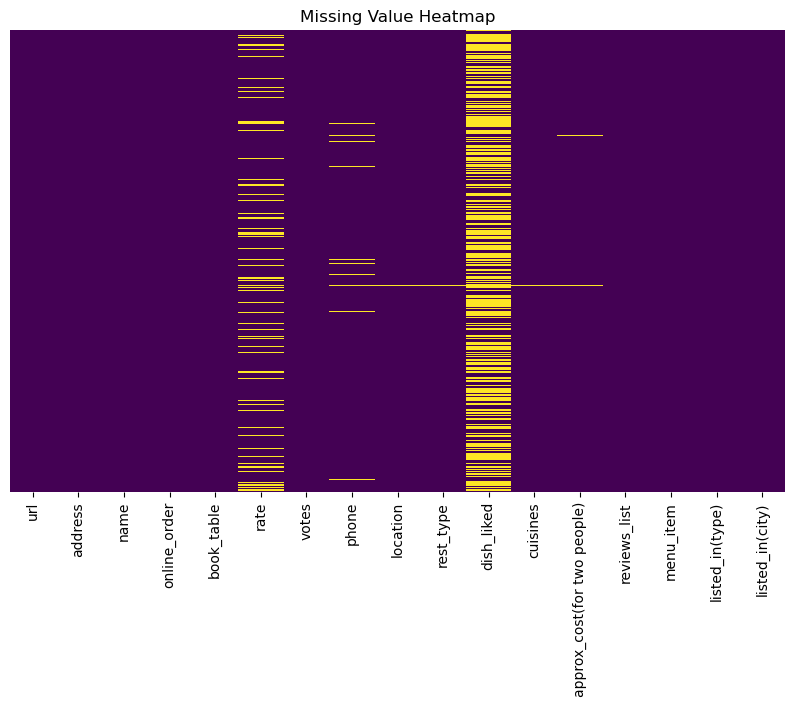

In [9]:
# Create a missing values heatmap using seaborn to know how theyre distributed
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=False, yticklabels=False)

plt.title('Missing Value Heatmap')
plt.show()

In [10]:
#clean up the rate column ; since each value is out of 5 anyway 
# Check the current state of the 'rate' column 
print("Before cleaning:")
print(df['rate'].sample(25))

Before cleaning:
18042     4.1/5
19512     3.9/5
37733    4.1 /5
47574    3.8 /5
34646       NaN
43213    3.6 /5
28121     3.4/5
49985       NaN
39134    4.3 /5
40973    4.4 /5
16241     4.5/5
46887    3.5 /5
6427      3.4/5
3299      2.7/5
39580    4.1 /5
43599    3.3 /5
21178    3.9 /5
5572      3.8/5
25003     3.6/5
25106     3.8/5
32876    3.8 /5
36064    4.1 /5
12459     3.1/5
696       4.1/5
19226     3.0/5
Name: rate, dtype: object


In [11]:
# Create a new column 'rate_new' with cleaned values
df['rate_new'] = df['rate'].str.extract('(\d+\.\d+)').astype(float)

# Check the cleaned 'rate_new' column
print("\nAfter cleaning:")
print(df['rate_new'].head())


After cleaning:
0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate_new, dtype: float64


In [12]:
#chi squared test for independence
# H0:Independence - the missingness in the rate column has no association with the values in the online_oder_binary column
# HA: Dependence - otherwise.

In [13]:
#perform the chi-squared test for independence between the missingness of each of these columns and the categorical columns
#this is to help us understand how we can best impute the missing values in the columns
from scipy.stats import chi2_contingency
#rate column
# Create binary variables indicating missingness
df['rate_missing'] = df['rate_new'].isnull().astype(int)
df['online_order_binary'] = (df['online_order'] == 'Yes').astype(int)

In [14]:
# Create a contingency table between the missingness variable and the categorical variable
contingency_table = pd.crosstab(df['rate_missing'], df['online_order_binary'])
# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
online_order_binary      0      1
rate_missing                     
0                    14459  27206
1                     6814   3238


In [15]:
#The count of missing rate values seems to be higher when online_order is Yes/1 ; lets confrim the correlation further

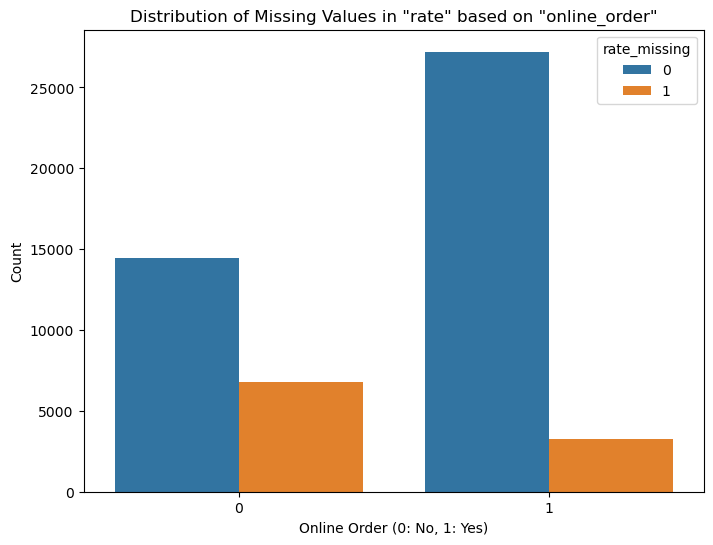

In [16]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order_binary', hue='rate_missing', data=df)
plt.title('Distribution of Missing Values in "rate" based on "online_order"')
plt.xlabel('Online Order (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [17]:
# Perform chi-squared test for independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
# Print results
print(f"Chi-squared test for independence between 'rate_missing' and 'online_order_binary':")
print(f"Chi2-stat: {chi2_stat}, p-value: {p_value}")

Chi-squared test for independence between 'rate_missing' and 'online_order_binary':
Chi2-stat: 3659.4365457867743, p-value: 0.0


In [18]:
#CONCLUSION
#With a P-Value of 0.0, we reject the null hypothesis.Therefore, there is enough statistical evidence to suggest that
#there is an association between the missingness of the 'rate' column and the values of the 'online_order' column.

In [19]:
#impute values in the rate column according to their correlation with the online_order column
# Create a copy of the DataFrame to store imputed values
df_imputed = df.copy()

In [20]:
# Identify missing values in the 'rate' column
missing_values = df_imputed['rate_new'].isnull()

In [21]:
# Fit a regression model using 'online_order' as a predictor
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df_imputed.loc[~missing_values, ['online_order_binary']]  # Non-missing data
y = df_imputed.loc[~missing_values, 'rate_new']  # Observed 'rate' values
# Fit the model
model.fit(X, y)

LinearRegression()

In [22]:
# Predict missing values
imputed_values = model.predict(df_imputed.loc[missing_values, ['online_order_binary']])

In [23]:
# Assign imputed values to the 'rate' column in the new column 'rate_imputed'
df_imputed.loc[missing_values, 'rate_imputed'] = imputed_values

In [24]:
# Check the imputed 'rate_imputed' column
print("\nAfter imputation:")
print(df_imputed[['rate_new', 'rate_imputed', 'online_order']].sample(25))
#the rate_imputed column contains newly generated values missing in the rate_new column


After imputation:
       rate_new  rate_imputed online_order
16195       3.3           NaN          Yes
48062       4.1           NaN           No
1372        4.1           NaN           No
28903       2.8           NaN           No
24314       NaN       3.72244          Yes
19033       3.6           NaN           No
24841       3.9           NaN           No
12474       NaN       3.65907           No
18448       NaN       3.65907           No
38612       4.6           NaN           No
28994       3.8           NaN          Yes
23621       4.1           NaN          Yes
35759       3.2           NaN          Yes
19706       3.9           NaN          Yes
1056        3.8           NaN          Yes
42983       NaN       3.65907           No
4820        4.3           NaN           No
6043        4.2           NaN           No
12735       3.9           NaN          Yes
41546       4.5           NaN           No
35312       3.6           NaN          Yes
47065       NaN       3.65907      

In [25]:
# Replace NaN values in the original 'rate' column with imputed values
df_imputed.loc[missing_values, 'rate_new'] = imputed_values
# Check random values in the imputed 'rate' column
print("\nAfter imputation:")
print(df_imputed[['rate_new', 'online_order']].sample(30))


After imputation:
       rate_new online_order
18912   3.60000          Yes
41066   3.40000           No
39227   3.00000           No
50970   3.72244          Yes
9459    3.90000          Yes
12679   4.40000           No
43018   3.65907           No
1446    3.90000          Yes
41681   3.65907           No
42633   4.20000          Yes
49908   3.90000          Yes
26079   3.72244          Yes
45925   4.20000          Yes
49213   4.30000          Yes
13504   4.00000          Yes
33924   4.20000           No
19325   3.65907           No
17262   3.70000          Yes
8549    4.10000          Yes
34492   2.80000          Yes
3397    3.65907           No
44136   3.72244          Yes
31261   3.70000           No
49312   2.70000           No
49712   3.20000          Yes
38187   2.10000          Yes
51104   3.70000           No
939     3.30000          Yes
25963   3.50000           No
40103   4.10000          Yes


In [26]:
#there are still a few values missing in the rate_new column
# Calculate the mean of the non-missing values in the 'rate_new' column
mean_rate1 = df['rate_new'].mean()

# Impute missing values in the 'rate_new' column with the mean
df['rate_new'] = df['rate_new'].fillna(mean_rate1)

In [28]:
#clean up the rate column ; since each value is out of 5 anyway 
# Check the current state of the 'rate' column 
print("Before cleaning:")
print(df['location'].sample(50))

Before cleaning:
25510                 Nagawara
35958                      BTM
39158                 Majestic
45302             Marathahalli
44744       Jeevan Bhima Nagar
37292                      BTM
35804                      BTM
28249    Koramangala 5th Block
25260                Banaswadi
29124                      BTM
29283    Koramangala 7th Block
35081        Bannerghatta Road
2836                 Jayanagar
21706                      BTM
47342          Cunningham Road
5653              Shanti Nagar
25254                   Hennur
20019                Jayanagar
27977                      BTM
48876            Sarjapur Road
17825              Indiranagar
7334                Whitefield
36681    Koramangala 5th Block
31685                      BTM
18226              Indiranagar
35167    Koramangala 5th Block
2261                  JP Nagar
15565             Shivajinagar
28377    Koramangala 6th Block
28594    Koramangala 7th Block
46093              Indiranagar
29810            Wilso

In [29]:
#Find out if the missing locations are for a specific city
# Create a cross-tabulation between 'listed_in(city)' and missing values in 'location'
cross_tab = pd.crosstab(df['listed_in(city)'], df['location'].isnull())

# Display the cross-tabulation
print(cross_tab)


location               False  True 
listed_in(city)                    
BTM                     3278      1
Banashankari             863      0
Bannerghatta Road       1616      1
Basavanagudi            1266      0
Bellandur               1227      0
Brigade Road            1769      0
Brookefield             1518      0
Church Street           1827      0
Electronic City         1228      1
Frazer Town             1185      0
HSR                     1740      1
Indiranagar             1860      0
JP Nagar                2096      0
Jayanagar               2371      0
Kalyan Nagar            1309      0
Kammanahalli            1328      1
Koramangala 4th Block   2776      3
Koramangala 5th Block   2833      3
Koramangala 6th Block   2621      2
Koramangala 7th Block   2937      1
Lavelle Road            1744      0
MG Road                 1811      0
Malleshwaram            1095      1
Marathahalli            1657      2
New BEL Road             740      0
Old Airport Road        1425

In [30]:
# Create a DataFrame with non-null values in 'location' and 'listed_in(city)'
valid_locations = df[['location', 'listed_in(city)']].dropna()

# Group by 'listed_in(city)' and count unique locations
unique_locations_per_city = valid_locations.groupby('listed_in(city)')['location'].nunique()

# Display the result
print("Unique Locations per Listed City:")
print(unique_locations_per_city)

Unique Locations per Listed City:
listed_in(city)
BTM                      26
Banashankari             12
Bannerghatta Road        13
Basavanagudi             21
Bellandur                14
Brigade Road             46
Brookefield              10
Church Street            45
Electronic City           5
Frazer Town              34
HSR                      22
Indiranagar              30
JP Nagar                 17
Jayanagar                26
Kalyan Nagar             14
Kammanahalli             18
Koramangala 4th Block    31
Koramangala 5th Block    30
Koramangala 6th Block    30
Koramangala 7th Block    32
Lavelle Road             44
MG Road                  42
Malleshwaram             18
Marathahalli             13
New BEL Road              8
Old Airport Road         20
Rajajinagar              20
Residency Road           46
Sarjapur Road            11
Whitefield                9
Name: location, dtype: int64


In [31]:
#impute missing values based on the most frequent location within each listed_in(city)
# Create a new column 'location_new' to store all location values
df['location_new'] = df['location']

# Identify missing values in the 'location_new' column
missing_values = df['location_new'].isnull()

In [32]:
# Group by 'listed_in(city)' and find the most frequent location for each city
most_frequent_locations = df.groupby('listed_in(city)')['location_new'].agg(lambda x: x.value_counts().idxmax())

In [33]:
# Impute missing values in 'location_new' based on the corresponding 'listed_in(city)'
df.loc[missing_values, 'location_new'] = df.loc[missing_values, 'listed_in(city)'].map(most_frequent_locations)
# Check the imputed 'location_new' column
print("After imputation:")
print(df[['location', 'location_new', 'listed_in(city)']].sample(25))

After imputation:
                    location           location_new        listed_in(city)
47255           Brigade Road           Brigade Road         Residency Road
26995  Koramangala 7th Block  Koramangala 7th Block  Koramangala 4th Block
19362                 Domlur                 Domlur            Indiranagar
27731                    BTM                    BTM  Koramangala 4th Block
46863            Rajajinagar            Rajajinagar            Rajajinagar
41530           Marathahalli           Marathahalli           Marathahalli
32636  Koramangala 5th Block  Koramangala 5th Block  Koramangala 6th Block
33888  Koramangala 6th Block  Koramangala 6th Block  Koramangala 6th Block
13270          Richmond Road          Richmond Road          Church Street
46656            Rajajinagar            Rajajinagar            Rajajinagar
29838  Koramangala 1st Block  Koramangala 1st Block  Koramangala 5th Block
36407  Koramangala 7th Block  Koramangala 7th Block  Koramangala 7th Block
18148  

In [34]:
#View the changes youve made
missing_values_original = df['location'].isnull()
# Display only rows where 'location' is NaN
imputed_locations = df[missing_values_original][['location', 'location_new', 'listed_in(city)']]

print("Rows with Imputed Values:")
print(imputed_locations)

Rows with Imputed Values:
      location       location_new        listed_in(city)
1662       NaN  Bannerghatta Road      Bannerghatta Road
9874       NaN                BTM                    BTM
13693      NaN    Electronic City        Electronic City
16351      NaN                HSR                    HSR
26432      NaN       Kalyan Nagar           Kammanahalli
26519      NaN                BTM  Koramangala 4th Block
27672      NaN                BTM  Koramangala 4th Block
28611      NaN                BTM  Koramangala 4th Block
29298      NaN                BTM  Koramangala 5th Block
30604      NaN                BTM  Koramangala 5th Block
31400      NaN                BTM  Koramangala 5th Block
32131      NaN                BTM  Koramangala 6th Block
33457      NaN                BTM  Koramangala 6th Block
34755      NaN                BTM  Koramangala 7th Block
40354      NaN       Malleshwaram           Malleshwaram
40556      NaN       Marathahalli           Marathahalli
41980

In [35]:
# Count the number of unique 'rest_type' values per 'location'
rest_type_per_location = df.groupby('location_new')['rest_type'].nunique()

# Display the result
print("Unique 'rest_type' Count per 'location':")
print(rest_type_per_location)

Unique 'rest_type' Count per 'location':
location_new
BTM                  30
Banashankari         27
Banaswadi            23
Bannerghatta Road    31
Basavanagudi         18
                     ..
West Bangalore        3
Whitefield           47
Wilson Garden        12
Yelahanka             1
Yeshwantpur          14
Name: rest_type, Length: 93, dtype: int64


In [36]:
# Check the current state of the 'approx_cost(for two people)' column
print("Before imputation:")
print(df['approx_cost(for two people)'].sample(15))

Before imputation:
31199      300
47060      500
11755      550
35631      150
20441      600
43013      400
38760      800
16508      800
33471      500
38189    1,300
12597    1,400
27889      300
14613      400
36859      800
34577      400
Name: approx_cost(for two people), dtype: object


In [37]:
# Create a new column 'newapprox_cost(for two people)' with original values
df['newapprox_cost(for two people)'] = df['approx_cost(for two people)']
df['newapprox_cost(for two people)'] = pd.to_numeric(df['newapprox_cost(for two people)'], errors='coerce')


In [38]:
# Calculate the mean
mean_cost = df['newapprox_cost(for two people)'].mean()

# Impute missing values in the same column 'newapprox_cost(for two people)' with the mean
df['newapprox_cost(for two people)'] = df['newapprox_cost(for two people)'].fillna(mean_cost)

# Check the imputed 'newapprox_cost(for two people)' column
print("\nAfter imputation:")
print(df[['approx_cost(for two people)', 'newapprox_cost(for two people)']].sample(10))


After imputation:
      approx_cost(for two people)  newapprox_cost(for two people)
33158                       1,300                      416.630112
30980                         300                      300.000000
13068                       1,300                      416.630112
33130                         300                      300.000000
16772                         300                      300.000000
37715                       4,100                      416.630112
28165                         450                      450.000000
40911                         500                      500.000000
24097                         750                      750.000000
50725                         400                      400.000000


In [41]:
#Handling duplicate rows
df.drop_duplicates(inplace=True)


In [47]:
# Calculate skewness for 'newapprox_cost(for two people)' and 'rate_new'
from scipy.stats import skew
skewness_cost = skew(df['newapprox_cost(for two people)'])
skewness_rate = skew(df['rate_new'])

print("Skewness for 'newapprox_cost(for two people)':", skewness_cost)
print("Skewness for 'rate_new':", skewness_rate)

Skewness for 'newapprox_cost(for two people)': 0.6309275751664474
Skewness for 'rate_new': -0.3660866968729264


In [48]:
##rate_new is skewed to the left--long left tail
#while newapprox_cost(for two people) is skewed to the right

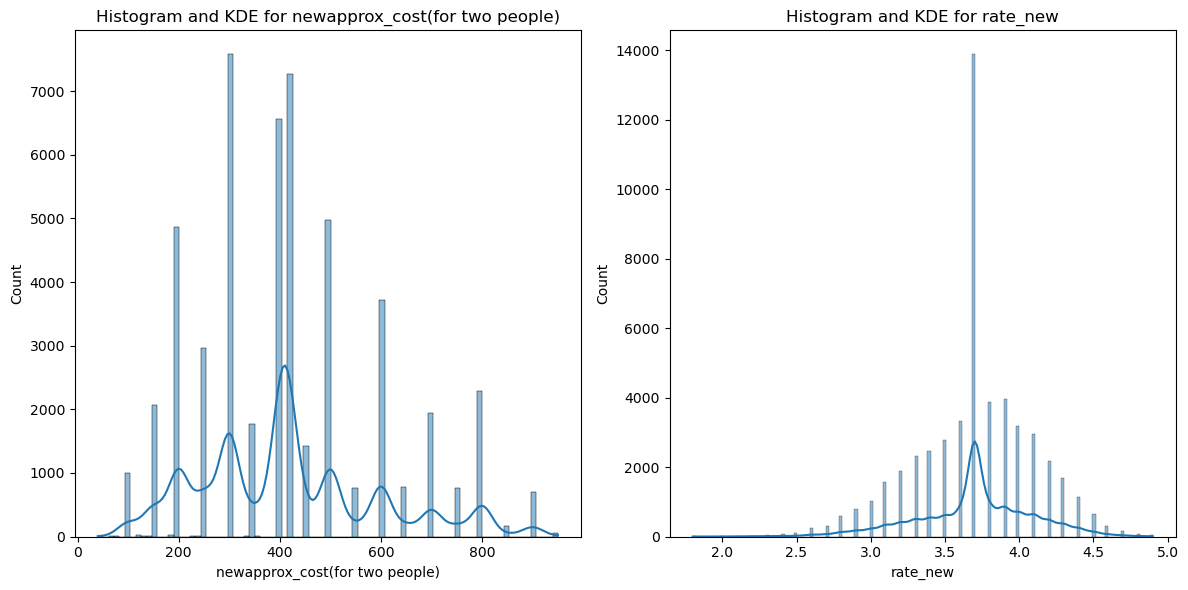

In [49]:
# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histograms with fitted KDEs for 'newapprox_cost(for two people)' and 'rate_new'
sns.histplot(df['newapprox_cost(for two people)'], kde=True, ax=axes[0])
axes[0].set_title('Histogram and KDE for newapprox_cost(for two people)')

sns.histplot(df['rate_new'], kde=True, ax=axes[1])
axes[1].set_title('Histogram and KDE for rate_new')

plt.tight_layout()
plt.show()

In [45]:
#Identifying and dealing with outliers
#data points where the Z-score is either <-3 or >3 are considered outliers--numeric columns
from scipy.stats import zscore
z_scores = zscore(df['newapprox_cost(for two people)'])
outliers = (z_scores > 3) | (z_scores < -3)

z_scores = zscore(df['rate_new'])
outliers = (z_scores > 3) | (z_scores < -3)


In [50]:
#Using capping to handle the outliers-- using percentiles since the data is skewed
# Define the percentiles for capping (e.g., 95th percentile)
percentile_for_capping = 95

# Calculate the capping values based on percentiles
capping_value_cost = np.percentile(df['newapprox_cost(for two people)'], percentile_for_capping)
capping_value_rate = np.percentile(df['rate_new'], percentile_for_capping)

# Cap extreme values in 'newapprox_cost(for two people)'
df['newapprox_cost(for two people)'] = np.clip(df['newapprox_cost(for two people)'], None, capping_value_cost)

# Cap extreme values in 'rate_new'
df['rate_new'] = np.clip(df['rate_new'], None, capping_value_rate)

In [51]:
# Save DataFrame as a CSV file to same directory as python project
df.to_csv('final_zomato.csv', index=False)